<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando el Blog de  Hernán Casciari 


[Hernán Casciari](https://hernancasciari.com/#bio), es un escritor argentino, que escribe blog posts con cuentos e historias  relacionadas con el futbol, su vida, infancia, y relaciones familiares con toques de ficción. Este [blog](https://hernancasciari.com/blog/) es  tan interesantes que en 2005 fue premiado como “El mejor blog del mundo” por Deutsche Welle de Alemania. 

El objetivo de este caso-taller es construir un sistema de recomendación basado en los contenidos de los posts utilizando similitud de las palabras usadas o temas de los cuentos.

## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran el archivo `blog_casciari.csv` con el título, la fecha de publicación, y el contenido de los cuentos publicados en el blog  de sr. Casciari. Cargue estos datos en su *cuaderno* y reporte brevemente el contenido de la base.
   

In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np

# Convertir el csv a un dataframe usando pandas
casciari = pd.read_csv("data/blog_casciari.csv", sep = ",")

# Ilustrar la esturctura del dataframe
print(casciari.head())
# Exploramos la estructura del dataframe
print("La estructura del dataframe es de dimensión", casciari.shape)

# Vemos el cuento ejemplo - 160 La venganza del metegol
#example=casciari['cuento'][160]
print(casciari['titulo'][160])
print(casciari['cuento'][160])


                       titulo    fecha  \
0            El rincón blanco  1/11/08   
1  Mínimos avances en la cama  1/24/08   
2                  Don Marcos  2/19/08   
3              Los dos rulfos  3/26/08   
4   La noticia no es el perro  4/15/08   

                                              cuento  
0  De pronto yo estaba en el hogar donde pasé la ...  
1  Menos la cama, todo ha mejorado en este mundo....  
2  Dos veces, y no una, mi abuelo materno me ayud...  
3  A su regreso de México, mi amigo Comequechu no...  
4  De repente, un video de You Tube recibe un mil...  
La estructura del dataframe es de dimensión (520, 3)
La venganza del metegol
El mes pasado me invitaron a presentar un libro en Buenos Aires. Y como era un libro sobre fútbol, al final de la charla el director de la editorial nos invitó a jugar un partido de metegol (ese invento español al que sus creadores llaman, erróneamente, futbolín). Hacía años que no jugaba al metegol, pero por suerte me tocó de compañero u

#### Procedimiento:

1. Importamos las librerias a utilizar, en este caso son pandas y numpy
2. Convertimos el archivo csv a un dataframe utilizando pandas
3. Exploramos la estructura del dataframe
4. Usamos la función shape para visualizar las dimensiones del dataframe

#### Análisis y conclusiones: 

Podemos ver que el Blog de Hernán Casciri contiene 520 entradas y el archivo nos provee la información de título y fecha y cuento. 

### 2. Homogenización de textos

Para cumplir con el objetivo de generar recomendaciones en esta sección debe preparar los posts para poder ser utilizados en su sistema de recomendación. Para ello, "limpie" y "tokenize" cada uno de los cuentos, describiendo detalladamente los pasos que realizo y si transformó o eliminó ciertas palabras. Para asistirlo en la tarea he creado listas de *stopwords* que están disponibles en la carpeta `data`. En su procedimiento ilustre la limpieza con el cuento 'La venganza del metegol'. (En su limpieza recuerde que el objetivo es generar recomendaciones a partir de la similitud de las palabras o temas de los cuentos)

In [2]:
# Cargamos las librerías a utilizar
import spacy
import unidecode
import re
import pandas as pd

# Cargar el modelo para el idioma deseado 
nlp = spacy.load("es_core_news_sm")


## Agregamos las palabras de stopwords

# Cargamos las stopwords extra
extra_stopwords = pd.read_csv('data/stopwords_taller.csv', sep=',',header=None)
extra_stopwords.columns = ['stopwords']
extra_stopwords=set(extra_stopwords['stopwords'].to_list())

# Agregamos a nuestro modelo de SpaCy
nlp.Defaults.stop_words |= extra_stopwords

## Creamos la función que limpie por completo el texto de los cuentos (Basado en el taller)

def text_cleaning(txt):
    
    # Eliminar caracteres especiales
    # Aplicar unidecode para eliminar las tildes
    out = unidecode.unidecode(txt)    
    # Eliminar caracteres no deseados, números y espacios en blanco adicionales
    out = re.sub('[^A-Za-z0-9 ]+', ' ', out)
    # Eliminar espacios extras
    out = re.sub('\s+', ' ', out)    
    # Quitar números
    out = re.sub("\d+", "", out)    
    # Quitar espacios en blanco al principio y al final del texto
    out = out.strip()
    # Poner en minúsculas
    out = out.lower()
    #NLP object
    out = nlp(out)
    # Eliminar Stopwords
    out = [token.text for token in out if not token.is_stop]
    out = " ".join(out)
    # Obtener los lemas de cada palabra
    lemmas =[token.lemma_ for token in nlp(out)]
    # Convertir la lista de lemmas nuevamente a texto
    out = " ".join(lemmas)
    # Remover palabras muy cortas
    out = [token.text for token in nlp(out) if len(token) > 2]
    
    return out

## Se corre la función de limpieza:

clean = list(map(text_cleaning, casciari['cuento']))

# Unimos las tokens
clean_sentences = [" ".join(i) for i in clean]

# Vemos el cuento de la venganza del metegol
print(clean_sentences[160])

mes invitar presentar aires futbol charla director editorial invito jugar partido metegol invento espanol creador llamar erroneamente futbolin ano jugar metegol suerte tocar companero filosofo prestigioso poder ganar contrincante autor director editorial conocio juventud jugamos partido entero destrozamos facilidad pasmós ano practicar falso deporte muneca reflejo descubri perdido mana sentir edad destreza mantengamos indemne pelotuda convertir noticia char fotografo imagen partido metegol subir twitter estadio librerio gandhi air local izquierdo duchini gonzalo garz vistant derecho tomar abraham resultado match      match      palizar volvi recibir mail amigo infancia decio visto foto sorprendia companero filosofo admirabar juventud jugar metegol toma abraham pasar sueno decia partido imaginar diecisiete ano mirar ventana librerio gandhi escenar futuro sonrei recuerdo momentaneo desconcentro juego justo gol unico recibi defendia zago gol molinete gonzalo garz director editorial galern

#### Procedimiento:

1. Se procede a cargar el modulo del idioma a usar "es_core_news_sm"
2. Se agregan las palabras de stopwords a ese modulo
3. Se crea una función que aplique sobre el dataframe para que realice la limpieza correspondiente.
4. Se aplica la función sobre el dataframe.

#### Análisis y conclusiones: 

Como se puede observar el texto limpio a diferencia del original se encuentra más resumido y se han retirado varias palabras conectoras junto con caracteres que no se usan (cmo tildes y ñ)

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones de cuentos en el blog a un usuario que leyó 'La venganza del metegol'. Para ello vamos a utilizar distintas estrategias.

#### 3.1. Recomendaciones basadas en contenidos

##### 3.1.1. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando en la distancia de coseno donde el texto este vectorizado por `CountVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones.

In [3]:
# Utilice este espacio para escribir el código.

## Comenzamos el proceso de Vectorización

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Definimos un objeto CountVectorizer y creamos los vectores
count = CountVectorizer(stop_words=list(nlp.Defaults.stop_words))
count_matrix = count.fit_transform(casciari['cuento'])
count_matrix

<520x31439 sparse matrix of type '<class 'numpy.int64'>'
	with 135006 stored elements in Compressed Sparse Row format>

In [4]:
#Importamos la función 
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la matriz de similitud de coseno
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

cosine_sim2

array([[1.        , 0.05763125, 0.15401401, ..., 0.0297982 , 0.0791539 ,
        0.11313072],
       [0.05763125, 1.        , 0.10073516, ..., 0.11650663, 0.05704705,
        0.07058373],
       [0.15401401, 0.10073516, 1.        , ..., 0.09169374, 0.08498724,
        0.13918667],
       ...,
       [0.0297982 , 0.11650663, 0.09169374, ..., 1.        , 0.05247855,
        0.0346942 ],
       [0.0791539 , 0.05704705, 0.08498724, ..., 0.05247855, 1.        ,
        0.11506151],
       [0.11313072, 0.07058373, 0.13918667, ..., 0.0346942 , 0.11506151,
        1.        ]])

In [5]:
casciari.head(1)

,titulo,fecha,cuento
0,El rincón blanco,1/11/08,De pronto yo estaba en el hogar donde pasé la ...


In [6]:
## Se crea función de recomendador de cuentos

def recomendador(title, cosine_sim=cosine_sim2, df=casciari):
    
    #Paso 2
    df = df.reset_index()
    indices = pd.Series(df.index, index=df['titulo']).drop_duplicates()
    #Paso 3
    idx = indices[title]

    #Paso 4
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Paso 5
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    #Paso 6
    sim_scores = sim_scores[1:6]

    cuento_indices = [i[0] for i in sim_scores]

    #Paso 7
    return casciari['titulo'].iloc[cuento_indices]


## Se aplica con CountVector

recom=recomendador('La venganza del metegol', cosine_sim=cosine_sim2, df=casciari)
recom

17                       Cuento con bruja y tramontina
159                         Pajaritos en jaula gigante
519                   La madre de todas las desgracias
5                            El milagro de los pueblos
138    Nueve libros que me hicieron olvidar el Mundial
Name: titulo, dtype: object

#### Procedimiento:

1. Se importaron las librerías necesarias para realizar la labor.
2. Se uso CountVectorizer para definir un objeto y crear una matriz de conteo (count_matrix) de los textos de los cuentos en casciari.
3. Se calculo la matriz de similitud de coseno (cosine_sim2) utilizando la matriz de conteo generada previamente.
4. Se creo la función de recomendación
5. Se creo una función de recomendación en la que se calculan los puntajes de similitud entre los cuentos de entrada y los demás, se ordena este puntaje de mayor a menor, se seleccionan los 5 mejores y se devuelve los titulos de los 5 mejores aplicando la matriz de similitud recomendada.
6. Se aplico la función.

#### Análisis y conclusiones: 

Luego de aplicar la función `recomendador` se obtuvo que las cinco recomendaciones son los títulos 17, 159, 519, 5 y 138.

##### 3.1.2. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para  el cuento 'La venganza del metegol' usando nuevamente la distancia de coseno, pero ahora vectorice el texto usando `TF-IDFVectorizer`. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados del punto anterior y explique sus similitudes y/o diferencias.

In [7]:
# Utilice este espacio para escribir el código.

from sklearn.feature_extraction.text import TfidfVectorizer

#Definimos el objeto TF-IDF Vectorizer Object
tfidf = TfidfVectorizer()

#Construimos la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(clean_sentences)

#Dimensiones de la matriz
tfidf_matrix.shape

# Convertir la matriz dispersa a un DataFramem con el el vocabulario (palabras) que el TfidfVectorizer está utilizando
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz TF-IDF y las palabras del vocabulario
df_tfidf.head()

,aamir,abacaaado,abajo,abalanzar,abalanzo,abananado,abandonado,abandonar,abandono,abandón,...,zumbar,zumbido,zumr,zurda,zurdazo,zurdito,zurdo,zurraba,zurrar,zurrartir
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.016429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
### Como se ve existen palabras que no quedaron bien lematizadas se procede a crear un lematizador

# Lematizador propio
def Lematizador_propio(text):
    # Diccionario con las palabras y sus lemas correspondientes
    lemmas = {
        r"\babandona\b": "abandonar",
        r"\babandonado\b": "abandonar",
        r"\babandonandolo\b": "abandonar",
        r"\babandonar\b": "abandonar",
        r"\babandono\b": "abandonar",
        r"\bzumbido\b": "zumbar"
    }

    # Buscar y reemplazar las palabras usando expresiones regulares
    for pattern, lemma in lemmas.items():
        text = re.sub(pattern, lemma, text, flags=re.IGNORECASE)

    return text

# Limpiamos nuestro texto con el lematizador propio
clean_sentences2 = list(map(Lematizador_propio, clean_sentences))


#Definimos el objeto TF-IDF Vectorizer Object
tfidf = TfidfVectorizer()

#Construimos la matriz TF-IDF
tfidf_matrix = tfidf.fit_transform(clean_sentences2)

# Examinamos la nueva matriz
# Convertir la matriz dispersa a un DataFramem con el el vocabulario (palabras) que el TfidfVectorizer está utilizando
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Ver las primeras filas del  DataFrame resultante con la matriz TF-IDF y las palabras del vocabulario
df_tfidf.head()

,aamir,abacaaado,abajo,abalanzar,abalanzo,abananado,abandonar,abandón,abanico,abaraja,...,zumbadisir,zumbar,zumr,zurda,zurdazo,zurdito,zurdo,zurraba,zurrar,zurrartir
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.016429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Cargamos las funciones a utilizar
from sklearn.metrics.pairwise import linear_kernel

# Calculamos el producto punto
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [10]:
recom=recomendador('La venganza del metegol', cosine_sim=cosine_sim, df=casciari)
recom

17                       Cuento con bruja y tramontina
138    Nueve libros que me hicieron olvidar el Mundial
5                            El milagro de los pueblos
121                                      Gaussian blur
519                   La madre de todas las desgracias
Name: titulo, dtype: object

#### Procedimiento:


#### Análisis y conclusiones: 
Luego de aplicar la función `recomendador` se obtuvo que las cinco recomendaciones son los títulos 17, 138, 5, 121 y 519. En contraste con el anterior recomendador se tiene que se mantienen los títulos 17, 519, 5 y 138.

## 

##### 3.1.3. Genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para el cuento 'La venganza del metegol' usando el texto vectorizado por `TF-IDFVectorizer` y la correlación como medida de similitud. Explique el procedimiento que realizó y como ordenó las recomendaciones. Compare con los resultados de los puntos anteriores y explique sus similitudes y/o diferencias.

In [12]:
# Utilice este espacio para escribir el código.


## Se vectoriza el texto de nuevo
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(casciari['cuento'])

## Se cálcula la matriz de correlación
correlation_matrix = pd.DataFrame(np.corrcoef(tfidf_matrix.toarray()))

## Seleccionamos el cuento correspondiente
cuento_seleccionado = 160

## Obtenemos las recomendaciones excluyendo el cuento de metegol
correlation_scores = correlation_matrix.iloc[cuento_seleccionado]
correlation_scores[cuento_seleccionado] = 0  # Excluir el cuento de origen

## Obtenemos las 5 mejores recomendaicones
top_recommended_indices = correlation_scores.argsort()[::-1][:5]

## Se muestra el resultado
for i, idx in enumerate(top_recommended_indices):
    print(f"Recomendación {i + 1}: {idx} - {casciari['titulo'].iloc[idx]}")


Recomendación 1: 17 - Cuento con bruja y tramontina
Recomendación 2: 121 - Gaussian blur
Recomendación 3: 14 - Dice el Chiri, dice el Gordo
Recomendación 4: 414 - La desgracia venía en sobres papel madera
Recomendación 5: 107 - Matar la crisis a volantazos


### Procedimiento

### Análisis y Conclusiones
Luego de aplicar la función `recomendador` se obtuvo que las cinco recomendaciones son los títulos 17, 121, 14, 414 y 107. En contraste con el anterior recomendador se tiene que se mantienen los títulos 17 y 121.

##### 3.2. Recomendaciones basadas en temas

Usando modelado de temas con LDA, encuentre los temas subyacentes en el blog. Explique como eligió el numero óptimo de temas. Utilizando el tema asignado al cuento 'La venganza del metegol' y la probabilidad de pertenecer a este tema genere 5 recomendaciones de más recomendada (1) a menos recomendada (5) para este cuento. Explique el procedimiento que realizó. Compare con los resultados encontrados anteriormente y explique sus similitudes y/o diferencias. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [15]:
# Utilice este espacio para escribir el código.

## Se realizan lso siguientes pasos

# Cargamos la función 
from gensim.corpora import Dictionary

# Creamos la representación de diccionario del documento
dictionary = Dictionary(clean)  ## Se toma el resultado de la primera limpieza
dictionary

In [16]:
## Removemos palabras que aparecen en menos de 20 páginas o en más de 50%

dictionary.filter_extremes(no_below=20, no_above=0.5)

In [17]:
## Creamos el corpus de la matriz de frecuencia del documento

corpus = [dictionary.doc2bow(doc) for doc in clean]

## imprimimos el número de palabras con las que estimaremos el LDA

print('Numero de palabras únicas: %d' % len(dictionary))


Numero de palabras únicas: 1288


In [18]:
## Cargamos la función 

from gensim.models import LdaModel

## Estimamos el modelo

Estimacion = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    chunksize=1000,
    passes=20,
    iterations=400,
    alpha='auto',
    eta='auto',
    random_state=123,
    eval_every=None
)

In [19]:
from pprint import pprint

pprint(Estimacion.print_topics())

[(0,
  '0.009*"argentino" + 0.006*"hombre" + 0.006*"escribir" + 0.005*"ocurrir" + '
  '0.005*"llamar" + 0.005*"historia" + 0.004*"persona" + 0.004*"palabra" + '
  '0.004*"ejemplo" + 0.004*"llegar"'),
 (1,
  '0.011*"viejo" + 0.008*"caio" + 0.008*"mundial" + 0.007*"sueno" + '
  '0.007*"loco" + 0.006*"futbol" + 0.006*"partido" + 0.006*"jugar" + '
  '0.006*"americo" + 0.006*"gol"'),
 (2,
  '0.008*"ver" + 0.007*"hijo" + 0.007*"tenia" + 0.006*"chico" + 0.006*"viejo" '
  '+ 0.006*"pensar" + 0.006*"amigo" + 0.006*"mujer" + 0.006*"mano" + '
  '0.005*"hablar"')]


Vemos el peso de las diferentes palabras

In [20]:
## Se empieza el proceso para elegir el número de temas

from gensim.models import CoherenceModel

coherencemodel = CoherenceModel(model=Estimacion, texts=clean, dictionary=dictionary)
coherencemodel.get_coherence() 

0.29192011320260935

In [21]:
from gensim.models.ldamulticore import LdaMulticore

def calcular_coherencia(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

modelos, valores_c = calcular_coherencia(dictionary=dictionary, corpus=corpus, texts=clean, start=1, limit=10, step=1)

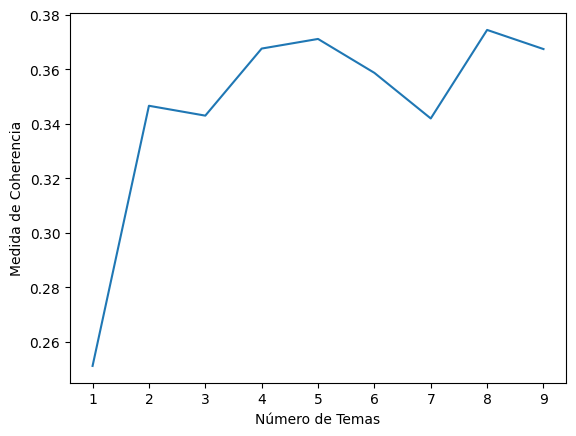

In [22]:
## Se grafican los resultados

import matplotlib.pyplot as plt
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_c)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Coherencia")
plt.show()

Con base en estos resultados se elige el número de temas

In [32]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [33]:
lda_model_opt = LdaMulticore(corpus = corpus,
    id2word = dictionary,
    num_topics = 4,
    random_state=123)
pyLDAvis.enable_notebook()
LDA_visualization = gensimvis.prepare(lda_model_opt, corpus, dictionary)
LDA_visualization

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.000025 -0.001548       1        1  29.729041
0      0.003917  0.004579       2        1  26.477033
3     -0.006348  0.001212       3        1  24.313101
1      0.002405 -0.004243       4        1  19.480825, topic_info=         Term        Freq       Total Category  logprob  loglift
1221    nacho  225.000000  225.000000  Default  30.0000  30.0000
250     viejo  469.000000  469.000000  Default  29.0000  29.0000
148    llegar  396.000000  396.000000  Default  28.0000  28.0000
900      rico   83.000000   83.000000  Default  27.0000  27.0000
172     negro  231.000000  231.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
121      hijo   71.111203  481.904588   Topic4  -5.5182  -0.2778
237     tenia   62.724847  382.632872   Topic4  -5.6437  -0.1726
438   empezar   58.799113  336.717480   Topic4  -5.7083  -0.1094
561     vivir   49.909770  238.379546   Topic4  -5.8722   0.0721
1273     caio   52.894026  331.789056   Topic4  -5.8142  -0.2005

[318 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1064      1  0.409734     agarro
1064      2  0.170723     agarro
1064      3  0.273156     agarro
1064      4  0.170723     agarro
1124      1  0.407391  agradecer
...     ...       ...        ...
1271      4  0.126686   zacarias
565       1  0.277266     zapato
565       2  0.201648     zapato
565       3  0.201648     zapato
565       4  0.327678     zapato

[852 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

In [34]:
## Se calcula la perplejidad
np.exp2(-lda_model_opt.log_perplexity(corpus))

127.31450141415469

In [25]:
## Se crea una función 

def perplejidad_ntemas(dictionary, corpus, texts, start=1, limit=10, step=1):
 
    perplejidad_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,
                        id2word=dictionary,
                        num_topics=num_topics, 
                        random_state=123,
                        passes=20)
        model_list.append(model)
        perplejidad_values.append(np.exp2(-model.log_perplexity(corpus)))

    return model_list, perplejidad_values

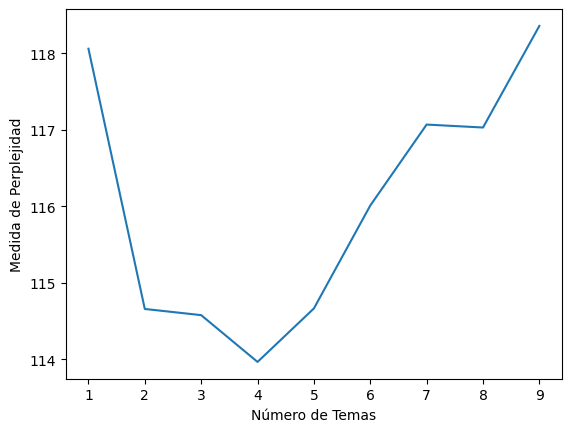

In [26]:
## Se modela y se gráfica
modelos, valores_p = perplejidad_ntemas(dictionary=dictionary, corpus=corpus, texts=clean, start=1, limit=10, step=1)

import matplotlib.pyplot as plt
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, valores_p)
plt.xlabel("Número de Temas")
plt.ylabel("Medida de Perplejidad")

plt.show()

In [35]:
## Definido el número de temas se procede a correr el modelo

# Probar diferentes números de temas
num_topics = 4

# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Obtener las asignaciones de temas para todos los cuentos
topic_assignments = lda_model.get_document_topics(corpus)

cuento_seleccionado = 'La venganza del metegol'

# Obtén las asignaciones de temas para el cuento seleccionado
temas_del_cuento = lda_model.get_document_topics(corpus[160])

# Ordenar los cuentos por probabilidad de pertenecer al mismo tema
cuentos_similares = sorted(enumerate(temas_del_cuento), key=lambda x: x[1], reverse=True)

# Obtener las 5 recomendaciones excluyendo el cuento de origen
top_recomendaciones = [cuentos_similares[i][0] for i in range(1, len(cuentos_similares))]

# Imprimir las recomendaciones
print("Recomendaciones para 'La venganza del metegol':")
for i, idx in enumerate(top_recomendaciones):
    print(f"Recomendación {i + 1}: {casciari['titulo'].iloc[idx]}")

Recomendaciones para 'La venganza del metegol':
Recomendación 1: El rincón blanco


(Utilice este espacio para describir el procedimiento, análisis, y conclusiones)

### 4 Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para la entrada elegida? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir su procedimiento)